In [104]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
from scipy.spatial.distance import cdist

no_points = 1000

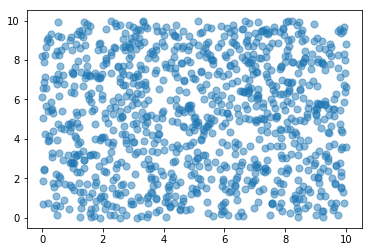

In [105]:
vector_points = np.random.uniform(0, 10, (no_points, 2)) #2D array of random values between 0 and 10 of size (no_points ,2)
    
plt.scatter(vector_points[:, 0], vector_points[:, 1], s=50, alpha=0.5)
plt.show()

In [106]:
def k_means_clustering(no_clusters, no_steps):
    """
    K Means Clustering using Tensorflow
    
    Arguments:
    no_clusters -- value of k
    no_steps -- no of iterations
    
    Returns:
    initial_centroids -- Randomly chosen k points as initial centroids
    points_values -- Set of points in the dataset
    assignment_values -- Cluster assignment for each point
    centroid_values -- Convergent values for centroid
    """
    ops.reset_default_graph()
    
    points = tf.constant(vector_points) 
    centroids = tf.Variable(tf.slice(tf.random_shuffle(points), [0, 0], [no_clusters, -1])) 
    
    expanded_points = tf.expand_dims(points, 0)      #Inserts a dimension of 1 at the dimension index 0
    expanded_centroids = tf.expand_dims(centroids, 1)#Inserts a dimension of 1 at the dimension index 1

    distances = tf.reduce_sum(tf.square(tf.subtract(expanded_points, expanded_centroids)), 2)     
    assignments = tf.argmin(distances, 0)
    
    means = []
    for c in range(no_clusters):
        means.append(tf.reduce_mean(
          tf.gather(points,
                    tf.reshape(
                      tf.where(
                        tf.equal(assignments, c)
                      ),[1,-1])
                   ),reduction_indices=[1]))
    new_centroids = tf.concat(means, 0)

    update_centroids = tf.assign(centroids, new_centroids)

    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)
        
        initial_centroids = sess.run(centroids)
        for step in range(no_steps):
            [_, centroid_values, points_values, assignment_values] = sess.run([update_centroids, centroids, points, assignments])
            
    
    return initial_centroids, points_values, assignment_values, centroid_values

In [107]:
def plot_clusters(initial_centroids, points_values, centroid_values, assignment_values):
    print("Initial centroids: \n",initial_centroids)
    print("Final centroids : \n", centroid_values) 
    plt.scatter(points_values[:, 0], points_values[:, 1], c=assignment_values, s=50, alpha=0.5)
    plt.plot(centroid_values[:, 0], centroid_values[:, 1], 'kx', markersize=15)
    plt.show()

Initial centroids: 
 [[9.6826618  2.68335606]
 [5.211871   1.63731592]
 [6.61430533 3.3756833 ]]
Final centroids : 
 [[7.80887729 3.53346231]
 [2.50590539 2.91503009]
 [4.87404935 8.06803345]]


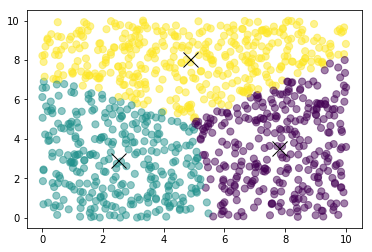

In [108]:
initial_centroids, points_values, assignment_values, centroid_values = k_means_clustering(3, 1000)
plot_clusters(initial_centroids, points_values, centroid_values, assignment_values)

Initial centroids: 
 [[2.91537155 0.67240998]
 [4.72365247 6.35520842]
 [9.43056004 3.64241808]]
Final centroids : 
 [[2.89286201 2.51793449]
 [3.92335189 8.01133032]
 [8.01121567 4.56233568]]


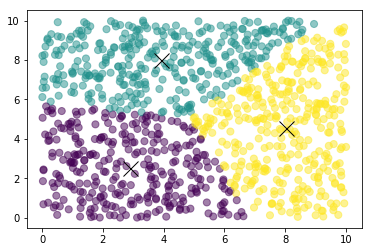

In [109]:
initial_centroids, points_values, assignment_values, centroid_values = k_means_clustering(3, 1000)
plot_clusters(initial_centroids, points_values, centroid_values, assignment_values)

The above two examples show that the final clustering and centroids are dependent on the choice of initial centroids.

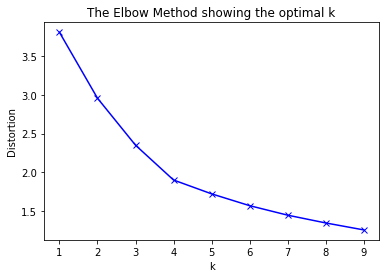

In [110]:
def elbow_plot():
    """
    Plots the elbow curve to determine optimal value for k
    """
    # k means determine k
    distortions = []
    K = range(1,10)
    for k in K:
        _,_,_, final_centroids = k_means_clustering(k, 1000)
        distortions.append(sum(np.min(cdist(vector_points, final_centroids, 'euclidean'), axis=1)) / vector_points.shape[0])

    # Plot the elbow
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()
    
elbow_plot()

From the above elbow plot, k=4 seems to be an optimal choice for number of clusters.